In [196]:
import requests
import json
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Question: Research Question: Which data science tool is more popular in the data science/statistics community pandas or R?
### Details : stackoverflow, stats.stackexchange, datascience.stackexchange - relative popularity of R vs Pandas in each community, and in comparison to each other. 
### Based on the nubmer of Questions, Use pandas/R tags within API call. 

## stackoverflow

In [197]:
#such a bitch to find the tag that grabs the total count of the query. filter = !Nfq4bHcltk388
# why does it default to only giving 30? I get it, resources, but like cmon. Also, the documentation mentioned you could use has_more 
# to get everything. HOW IN THE BALLS DO YOU DO THAT??

url1 = 'https://api.stackexchange.com/2.3/questions?order=desc&sort=activity&tagged=pandas&site=stackoverflow&filter=!Nfq4bHcltk388'
url2 = 'https://api.stackexchange.com/2.3/questions?order=desc&sort=activity&tagged=r&site=stackoverflow&filter=!Nfq4bHcltk388'
over_pandas = requests.get(url1)
over_r = requests.get(url2)

print(over_pandas.status_code)
print(over_r.status_code)

200
200


In [198]:
over_pandas.json()

{'total': 279112}

In [199]:
over_r.json()

{'total': 489386}

In [ ]:
#Idea. Ima forloop this. 

In [200]:
sites = ['stackoverflow', 'stats.stackexchange', 'datascience.stackexchange']
tags = ['r', 'pandas']

In [201]:
dataframe = {}
r_tag_count = []
pandas_tag_count = []
url = ''

for site in sites:
    for tag in tags:
        url = f'https://api.stackexchange.com/2.4/questions?order=desc&sort=activity&tagged={tag}&site={site}&filter=!Nfq4bHcltk388'
        req = requests.get(url)
        if req.status_code != 200:
            print("ERROR: YOU DID SOMETHING DUMB")
            print(req.status_code)
        
        req = req.json()
        
        if tag == 'r':
            r_tag_count.append(req['total'])
        else:
            pandas_tag_count.append(req['total'])

In [202]:
dataframe['site_name'] = sites
dataframe['r_tag_count'] = r_tag_count
dataframe['pandas_tag_count'] = pandas_tag_count

In [203]:
site_df = pd.DataFrame(dataframe)

In [204]:
site_df

,site_name,r_tag_count,pandas_tag_count
0,stackoverflow,489386,279112
1,stats.stackexchange,28775,165
2,datascience.stackexchange,1477,1311


In [205]:
site_df.set_index('site_name', inplace=True)

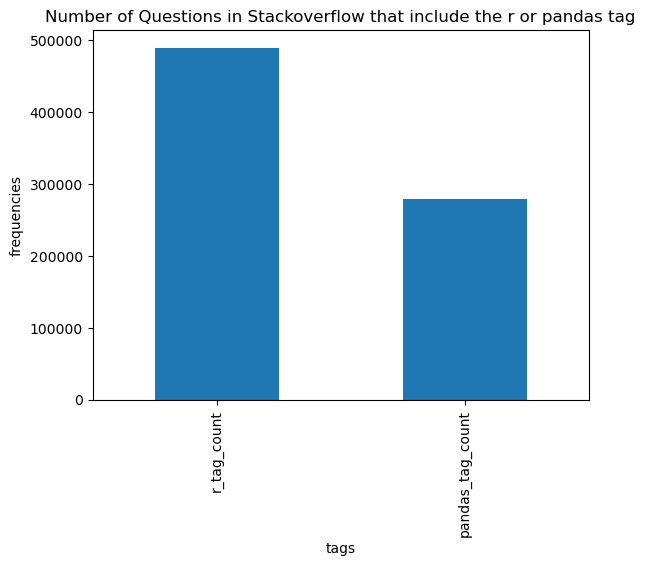

In [206]:
site_df.loc['stackoverflow'].plot.bar()
plt.xlabel('tags')
plt.ylabel('frequencies')
plt.title('Number of Questions in Stackoverflow that include the r or pandas tag')
plt.show()

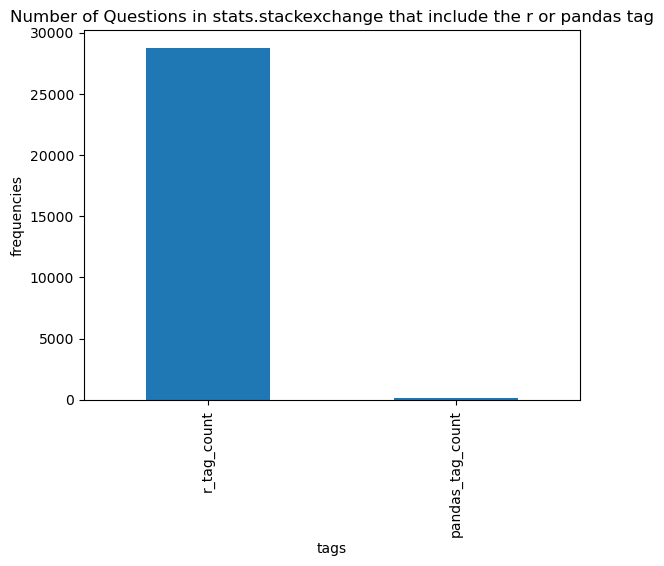

In [207]:
site_df.loc['stats.stackexchange'].plot.bar()
plt.xlabel('tags')
plt.ylabel('frequencies')
plt.title('Number of Questions in stats.stackexchange that include the r or pandas tag')
plt.show()

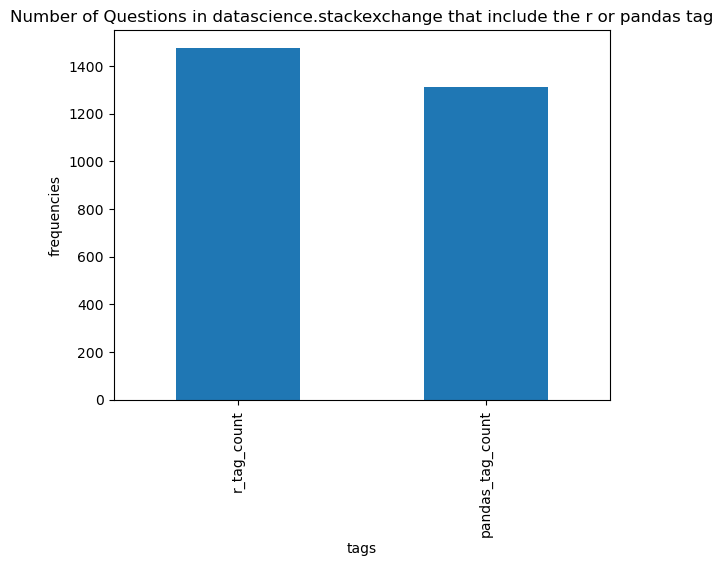

In [208]:
site_df.loc['datascience.stackexchange'].plot.bar()
plt.xlabel('tags')
plt.ylabel('frequencies')
plt.title('Number of Questions in datascience.stackexchange that include the r or pandas tag')
plt.show()

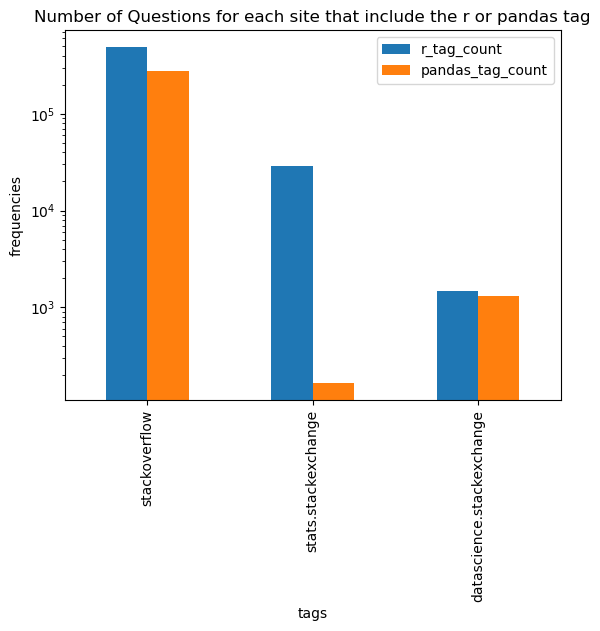

In [216]:
#log scale coming in clutch
site_df.plot(kind='bar', logy=True)
plt.xlabel('tags')
plt.ylabel('frequencies')
plt.title('Number of Questions for each site that include the r or pandas tag')
plt.show()

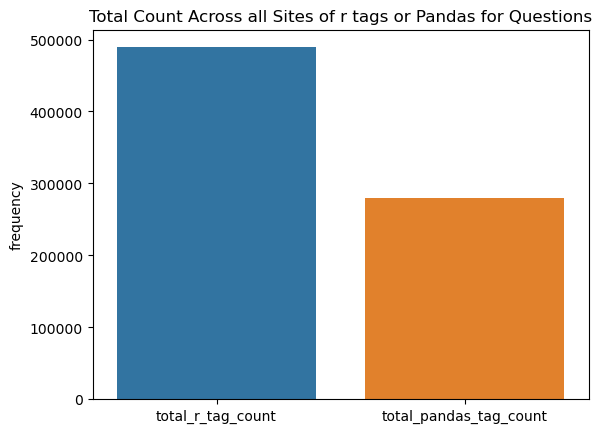

In [220]:
#final vis
sb.barplot(x=['total_r_tag_count', 'total_pandas_tag_count'], y = [site_df['r_tag_count'].max(), site_df['pandas_tag_count'].max()])
plt.ylabel('frequency')
plt.title('Total Count Across all Sites of r tags or Pandas for Questions')
plt.show()

# Answers

R seems to be more popular than pandas across all three wesbites. 
In both stackoverflow and datascience.stachexchange, the count is very close, but r wins by a hair. 
In stats.stackexchange, r wins by a landslide. 